In [1]:
from options_number import *

a = get_list_of_cid_for_version(5.0)
l = options(a)
l

[26376, 26376, 26460, 118780, 108489, 148501, 107441, 157397, 22823, 22819]

Text(0.5, 0.98, 'Categorical Plotting')

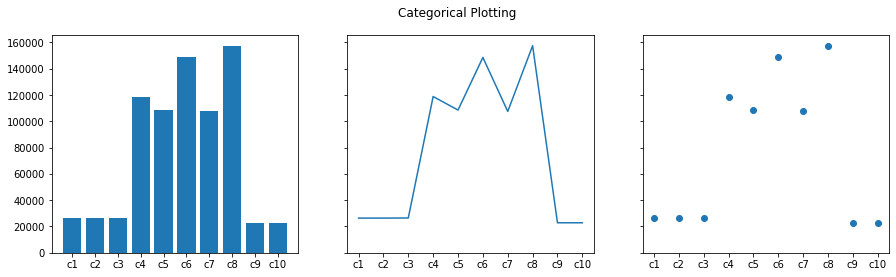

In [2]:
import matplotlib.pyplot as plt

names = ['c1', 'c2','c3', 'c4','c5','c6','c7','c8','c9','c10']
values = l

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axs[0].bar(names, values)
axs[1].plot(names, values)
axs[2].scatter(names, values)
fig.suptitle('Categorical Plotting')

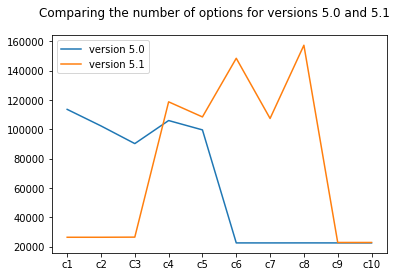

In [7]:
import numpy as np
import matplotlib.pyplot as plt

v1 = [113642, 102347, 90288, 106018, 99640, 22522, 22518, 22535, 22522, 22518]
v2 = l
activity = ["c1", "c2", "C3", "c4", "c5", "c6","c7","c8", "c9", "c10"]

fig, ax = plt.subplots()
ax.plot(activity, v1, label="version 5.0")
ax.plot(activity, v2, label="version 5.1")
fig.suptitle('Comparing the number of options for versions 5.0 and 5.1')
ax.legend()

plt.show()


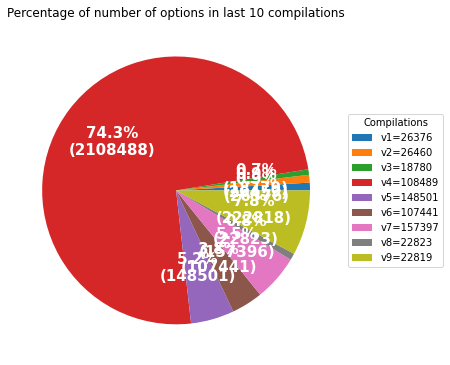

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 10), subplot_kw=dict(aspect="equal"))
recipe = ["26376 v1=26376",
          "26460 v2=26460",
          "18780 v3=18780",
          "2108489 v4=108489",
          "148501 v5=148501",
          "107441 v6=107441",
          "157397 v7=157397",
          "22823 v8=22823",
          "222819 v9=22819"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Compilations",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Percentage of number of options in last 10 compilations")

plt.show()